In [1]:
import ginsim

In [2]:
import pandas as pd 
from colomoto_jupyter import tabulate

In [4]:
model = ginsim.load("Mar2023.zginml")

In [5]:
ginsim.show(model)

In [6]:
import biolqm

In [8]:
lqm = ginsim.to_biolqm(model)

In [9]:
fps = biolqm.fixpoints(lqm)

In [10]:
tabulate(fps)

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0
3,0,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
5,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
6,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1
7,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0
8,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
9,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1


In [11]:
print(len(fps), "fixpoints")

16 fixpoints


Visualize stable satates 

In [43]:
ginsim.show(model, fps[13])

In [33]:
masim = ginsim.to_maboss(model)

In [34]:
# masim.network.set_output(('Dr', 'ind', 'vnd','en','wg','gsb','svp','ac'))  # markers
masim.network.set_output(('NB5_6', 'NB5_3', 'NB5_2', 'NB6_2', 'NB7_4', 'NB7_1'))

In [35]:
maboss.set_nodes_istate(masim, ["Hh", "Wg", "Egfr", 'pGro'], 
                          [0.5, 0.5])

In [36]:
print(masim.get_initial_state())

{'Egfr': [0, 1], 'pGro': [0, 1], 'Wg': [0, 1], 'Hh': [0, 1], 'Dr': 0, 'ind': 0, 'vnd': 0, 'en': 0, 'wg': 0, 'gsb': 0, 'svp': 0, 'ac': 0, 'NB7_4': 0, 'NB7_1': 0, 'NB5_6': 0, 'NB5_3': 0, 'NB5_2': 0, 'NB6_2': 0, 'Ptc': 0, 'Ci_act': 0, 'Ci_rep': 0, 'Fz': 0, 'Smo': 0, 'Arm': 0, 'Pan': 0, 'Rl': 0, 'Pnt': 0, 'Gro': 0, 'hh': 0, 'hkb': 0}


In [37]:
res = masim.run()

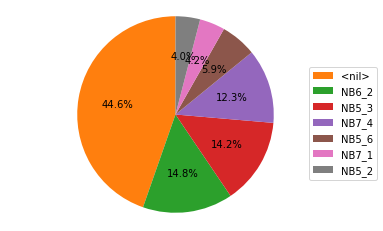

In [38]:
res.plot_piechart() 

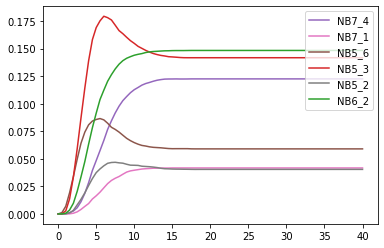

In [39]:
res.plot_node_trajectory(until=40)

In [40]:
print(res.get_fptable())

     FP   Proba                                              State  Egfr  \
0    #1  0.0612         pGro -- ind -- Ci_rep -- Ptc -- svp -- hkb     0   
1    #2  0.0607                         Dr -- Gro -- Ci_rep -- Ptc     0   
2    #3  0.0900  Egfr -- pGro -- Rl -- Wg -- ind -- Pnt -- Pan ...     1   
3    #4  0.0655  pGro -- Wg -- ind -- Pan -- en -- Ptc -- svp -...     0   
4    #5  0.0590  Hh -- Dr -- Gro -- Ci_act -- wg -- gsb -- NB5_...     0   
5    #6  0.0604  pGro -- Hh -- ind -- Ci_act -- wg -- gsb -- sv...     0   
6    #7  0.0848  Egfr -- pGro -- Rl -- ind -- Pnt -- Ci_rep -- ...     1   
7    #8  0.0417  Egfr -- pGro -- Rl -- Wg -- Hh -- vnd -- Pnt -...     1   
8    #9  0.0624  Wg -- Hh -- Dr -- Gro -- Pan -- en -- gsb -- a...     0   
9   #10  0.0404  Egfr -- pGro -- Rl -- Hh -- vnd -- Pnt -- Ci_a...     1   
10  #11  0.0601  Wg -- Dr -- Gro -- Pan -- en -- Ptc -- ac -- s...     0   
11  #12  0.0415  Egfr -- pGro -- Rl -- vnd -- Pnt -- Ci_rep -- ...     1   
12  #13  0.0